In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Proportion phosphorylation (protein and site level)

We aim to identify, for each project, how many phosphorylated proteins and sites have been identified, in comparison to other modifications. For this, we read in the raw data (both phospho- and otherwise modified). For the phosphodata, we filter out all but the canonical sites. For the other modifications, we filter out all data from prjects yielding no phospho-data. 150 projects remain.

In [2]:
data_all_mod = pd.read_csv("all_mod_data_tissue_annotation1.tsv", sep='\t')
data_P = pd.read_csv("phospho_data_tissue_annotation_enrichment1.txt", sep="\t")

In [3]:
data_all_mod.dropna(axis=0, subset=["tissue"], inplace=True)
data_P.dropna(axis=0, subset=["tissue"], inplace=True)
data_P = data_P[(data_P["modres"]=="S")|(data_P["modres"]=="T")|(data_P["modres"]=="Y")]
data_all_mod = data_all_mod[(data_all_mod["proj"]!="PXD001985")&(data_all_mod["proj"]!="PXD002014")&(data_all_mod["proj"]!="PXD002437")&
            (data_all_mod["proj"]!="PXD003533")&(data_all_mod["proj"]!="PXD004683")&(data_all_mod["proj"]!="PXD006095")&
            (data_all_mod["proj"]!="PXD006911")&(data_all_mod["proj"]!="PXD008568")&(data_all_mod["proj"]!="PXD009880")&
            (data_all_mod["proj"]!="PXD011241")&(data_all_mod["proj"]!="PXD011309")]

In [4]:
print(data_all_mod.shape[0])
print(data_P.shape[0])
list_proj1 = data_all_mod.groupby(["proj"], as_index=False).agg({"tissue": "first"})["proj"].to_list()
list_proj2 = data_P.groupby(["proj"], as_index=False).agg({"tissue": "first"})["proj"].to_list()
if list_proj1 == list_proj2:
    print("all projects included")
print(list_proj1)

4042382
377186
all projects included
['PXD000004', 'PXD000072', 'PXD000529', 'PXD000533', 'PXD000605', 'PXD001324', 'PXD001325', 'PXD001326', 'PXD001359', 'PXD001415', 'PXD001416', 'PXD001417', 'PXD001418', 'PXD001419', 'PXD001420', 'PXD001421', 'PXD001422', 'PXD001423', 'PXD001425', 'PXD001524', 'PXD001674', 'PXD002211', 'PXD002212', 'PXD002620', 'PXD002883', 'PXD002990', 'PXD003215', 'PXD003406', 'PXD003407', 'PXD003408', 'PXD003409', 'PXD003410', 'PXD003411', 'PXD003412', 'PXD003413', 'PXD003414', 'PXD003415', 'PXD003416', 'PXD003417', 'PXD003534', 'PXD003963', 'PXD003965', 'PXD003966', 'PXD003967', 'PXD003971', 'PXD004355', 'PXD004624', 'PXD004625', 'PXD004626', 'PXD004682', 'PXD005055', 'PXD005220', 'PXD005436', 'PXD005693', 'PXD005709', 'PXD005733', 'PXD005755', 'PXD006268', 'PXD006465', 'PXD006517', 'PXD006522', 'PXD006570', 'PXD006571', 'PXD006572', 'PXD006576', 'PXD006578', 'PXD006581', 'PXD006589', 'PXD006607', 'PXD006776', 'PXD006805', 'PXD006833', 'PXD006847', 'PXD006863', 

For both datasets, we count the amount of unique proteins identified.

In [5]:
P_protein_proj = data_P.groupby(["proj"], as_index=False)["ACC_ID"].nunique()
allmod_protein_proj = data_all_mod.groupby(["proj"], as_index=False)["ACC_ID"].nunique()
P_protein_proj.head()

,proj,ACC_ID
0,PXD000004,23
1,PXD000072,4
2,PXD000529,338
3,PXD000533,525
4,PXD000605,1


In [6]:
comb_protein_proj = pd.merge(P_protein_proj, allmod_protein_proj, how="inner", on="proj", suffixes=["_P", "_other_mod"])
comb_protein_proj.rename({"ACC_ID_P": "phosphoproteins", "ACC_ID_other_mod": "otherwise modified proteins"}, inplace=True, axis=1)
comb_protein_proj

,proj,phosphoproteins,otherwise modified proteins
0,PXD000004,23,811
1,PXD000072,4,317
2,PXD000529,338,3813
3,PXD000533,525,5308
4,PXD000605,1,152
...,...,...,...
145,PXD011000,2,596
146,PXD011175,2616,4336
147,PXD011204,1,141
148,PXD011492,20,918


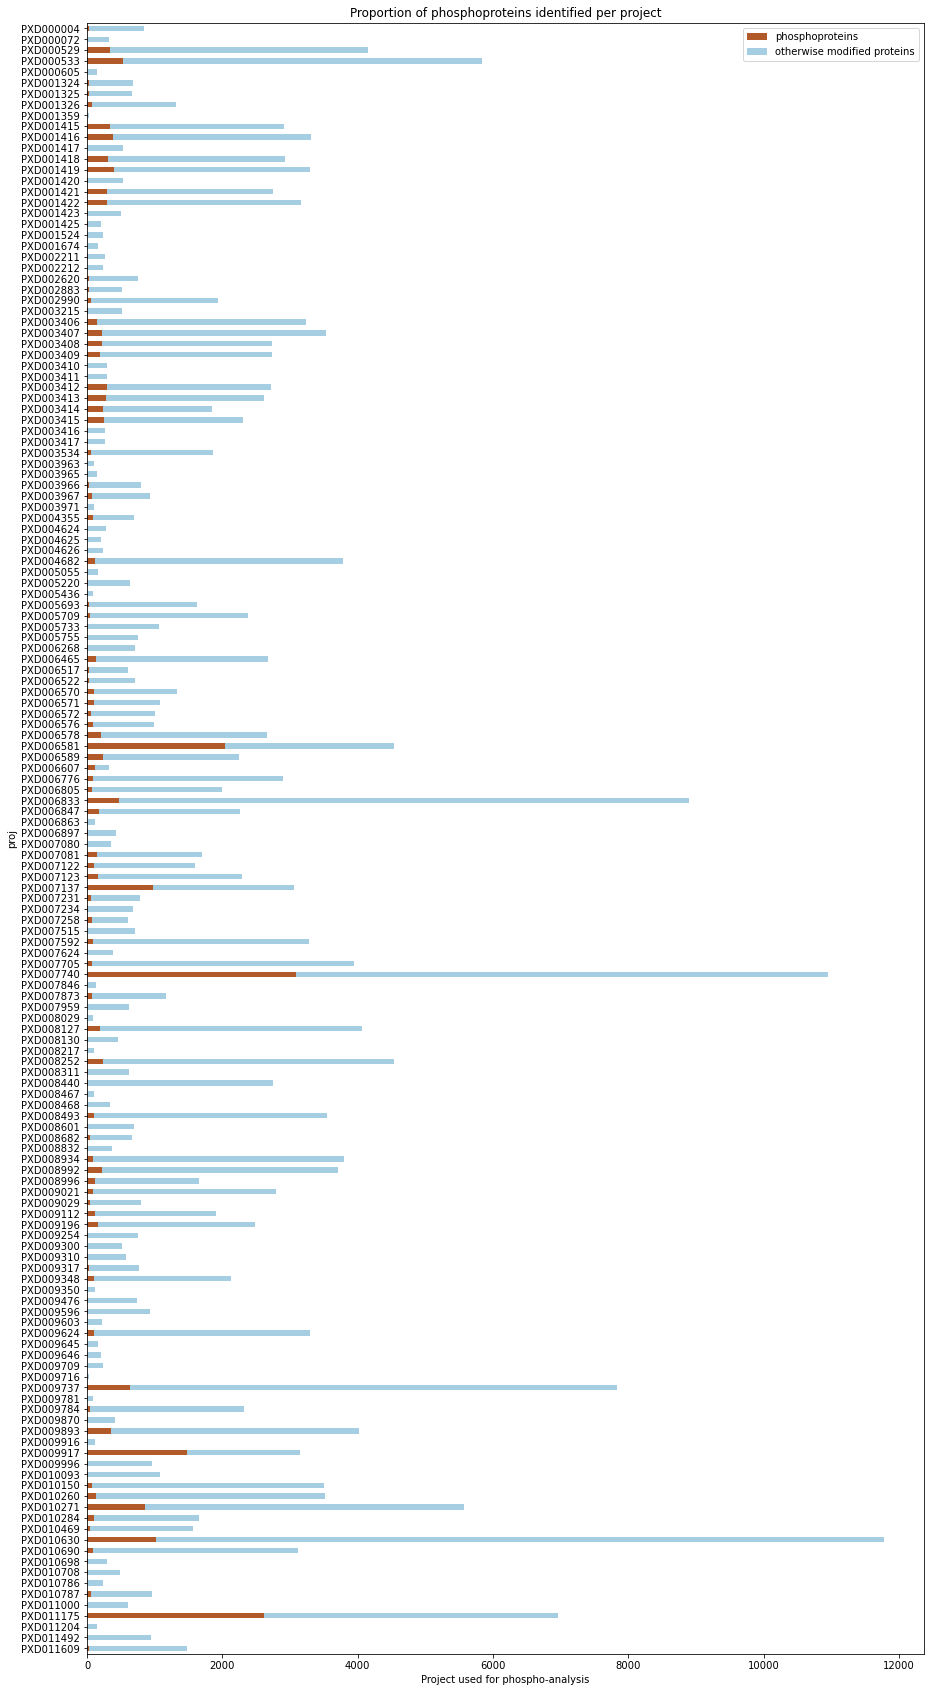

In [7]:
comb_protein_proj.sort_values(by=["proj"], ascending=False,inplace=False).plot(kind="barh",stacked=True, x="proj",
                                                                               colormap="Paired_r",figsize=(15,30))
plt.xlabel("Project used for phospho-analysis")
plt.title("Proportion of phosphoproteins identified per project")
#plt.savefig("/Users/Hanne/Documents/universiteit/thesis_MA2/images_thesis/article/Pproteins_per_proj.png", format="png", bbox_inches="tight")
plt.show()

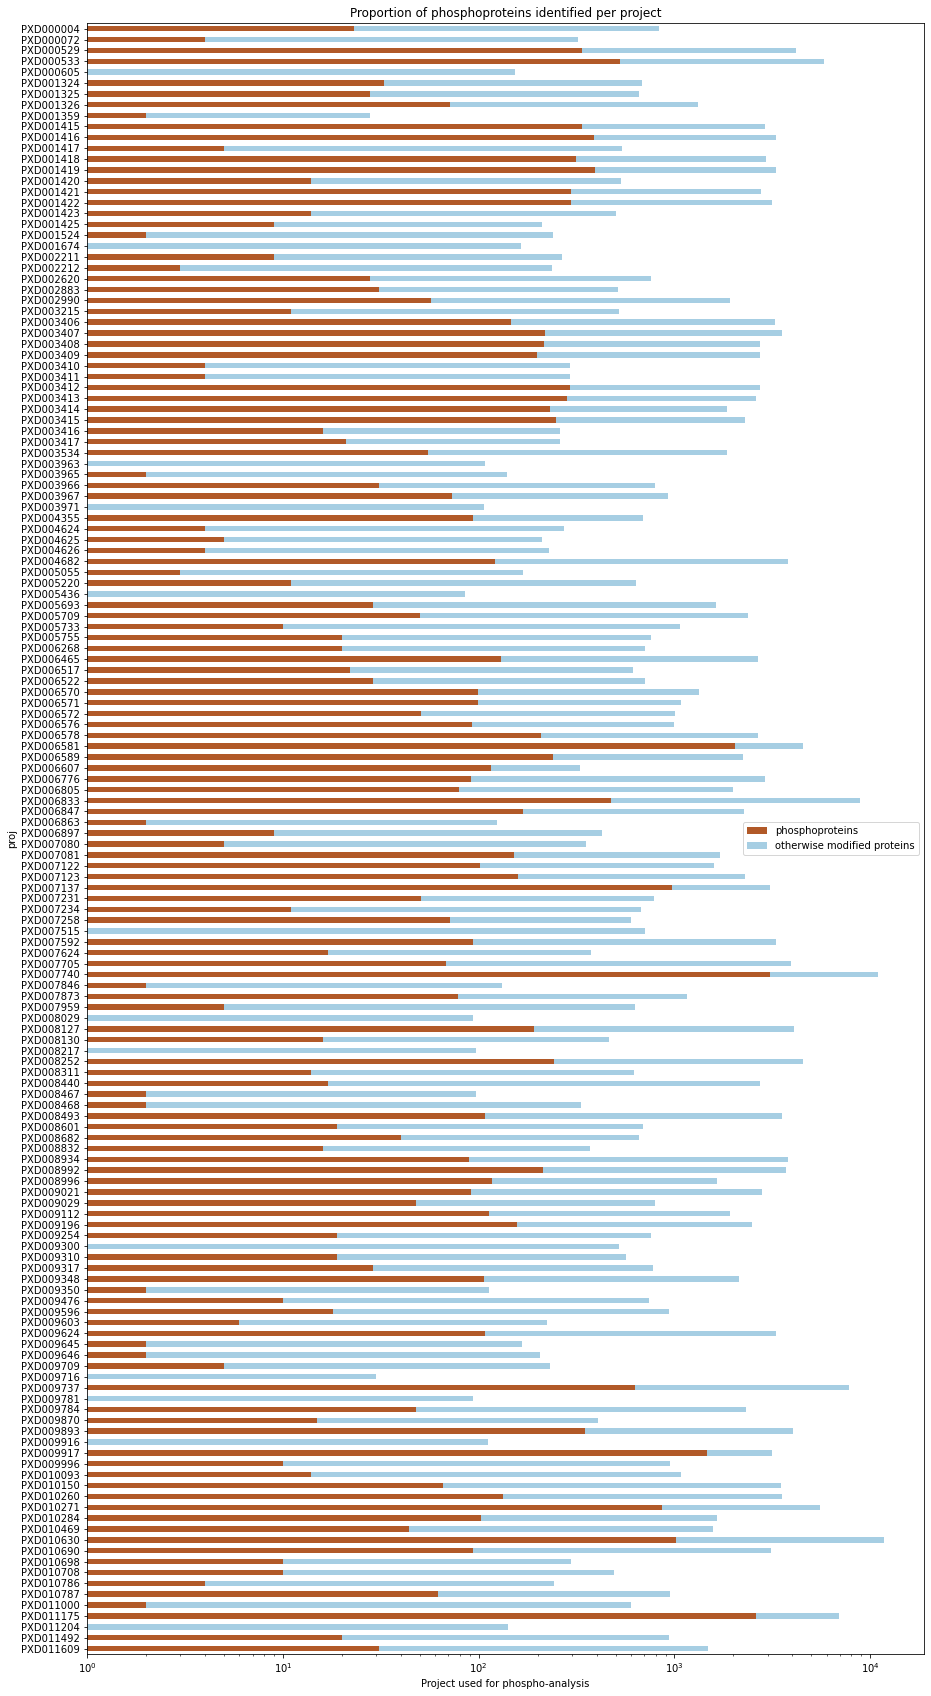

In [8]:
comb_protein_proj.sort_values(by=["proj"], ascending=False,inplace=False).plot(kind="barh",stacked=True, x="proj",
                                                                               logx=True,
                                                                               colormap="Paired_r",figsize=(15,30))
plt.xlabel("Project used for phospho-analysis")
plt.title("Proportion of phosphoproteins identified per project")
#plt.savefig("/Users/Hanne/Documents/universiteit/thesis_MA2/images_thesis/article/Pproteins_per_proj.png", format="png", bbox_inches="tight")
plt.show()

As different proteins can have modifications on the same site, we first group the data on the site level per project. As then only unique positions remain (per project), we can simply count the amount of modified positions.

In [9]:
P_site_proj_step1 = data_P.groupby(["proj", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
P_site_proj = P_site_proj_step1.groupby(["proj"], as_index=False)["UP_POS"].count()
allmod_site_proj_step1 = data_all_mod.groupby(["proj", "ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"})
allmod_site_proj = allmod_site_proj_step1.groupby(["proj"], as_index=False)["UP_POS"].count()
P_site_proj.head()

,proj,UP_POS
0,PXD000004,29
1,PXD000072,4
2,PXD000529,494
3,PXD000533,737
4,PXD000605,1


In [10]:
comb_site_proj = pd.merge(P_site_proj, allmod_site_proj, how="inner", on="proj", suffixes=["_P", "_other_mod"])
comb_site_proj.rename({"UP_POS_P": "phosphosites", "UP_POS_other_mod": "otherwise modified sites"}, inplace=True, axis=1)
comb_site_proj

,proj,phosphosites,otherwise modified sites
0,PXD000004,29,1557
1,PXD000072,4,529
2,PXD000529,494,10147
3,PXD000533,737,16930
4,PXD000605,1,433
...,...,...,...
145,PXD011000,4,1840
146,PXD011175,6513,14831
147,PXD011204,1,193
148,PXD011492,32,2637


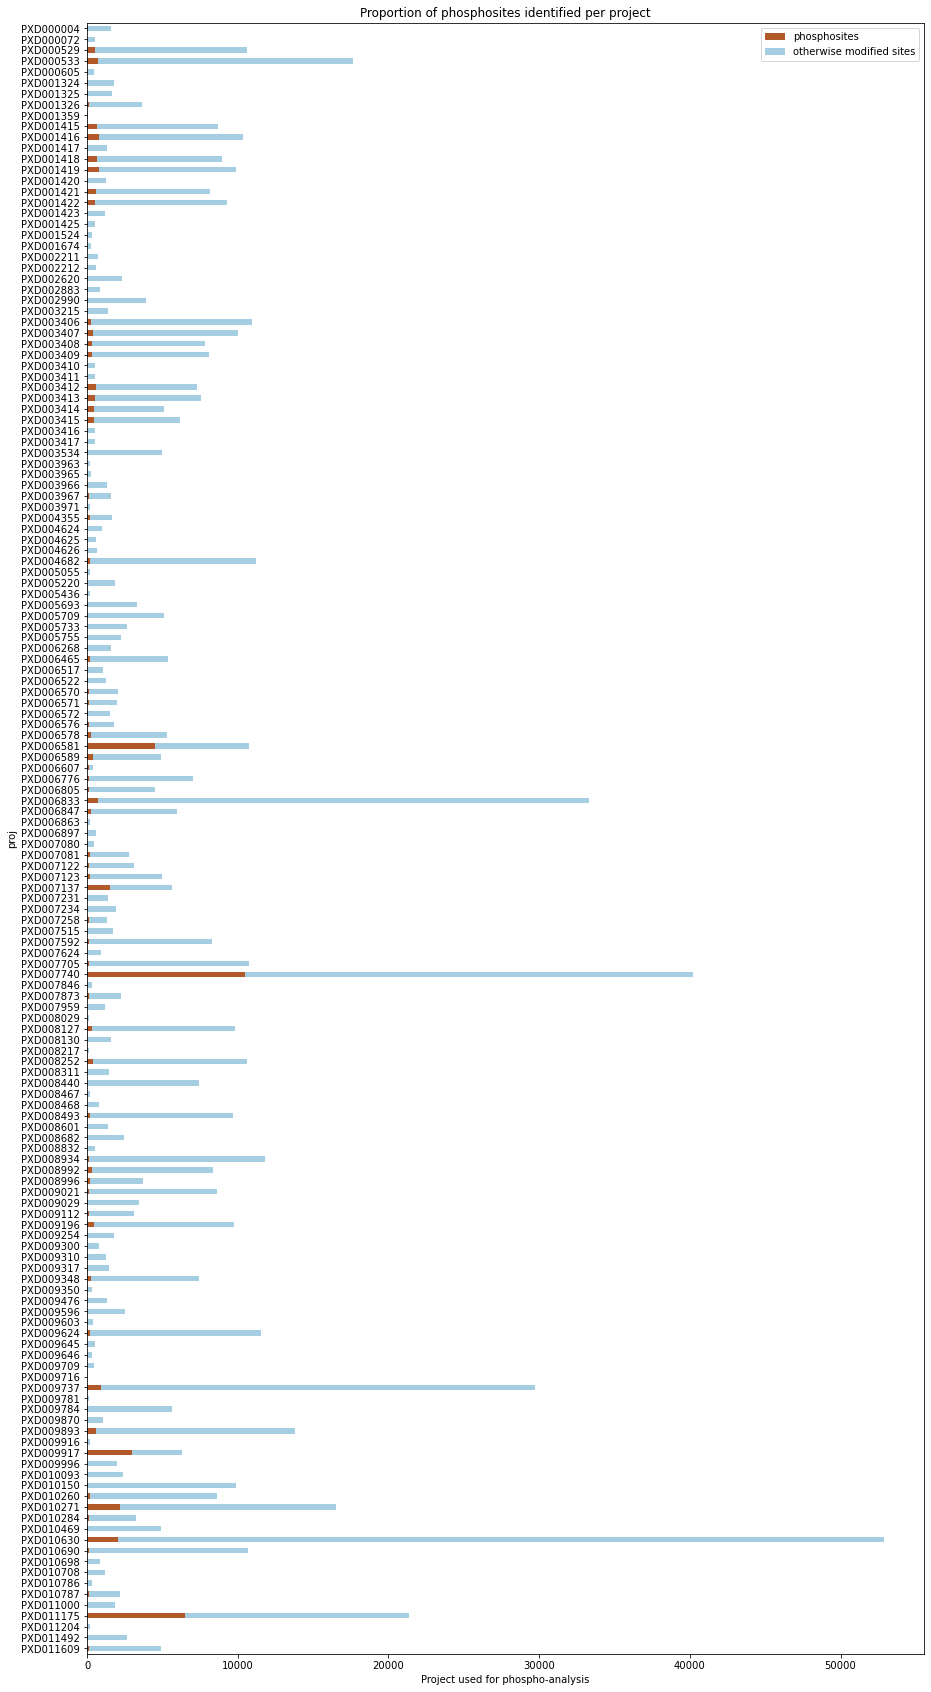

In [11]:
comb_site_proj.sort_values(by=["proj"], ascending=False,inplace=False).plot(kind="barh",stacked=True, x="proj",
                                                                               colormap="Paired_r",figsize=(15,30))
plt.xlabel("Project used for phospho-analysis")
plt.title("Proportion of phosphosites identified per project")
#plt.savefig("/Users/Hanne/Documents/universiteit/thesis_MA2/images_thesis/article/Psites_per_proj.png", format="png", bbox_inches="tight")
plt.show()

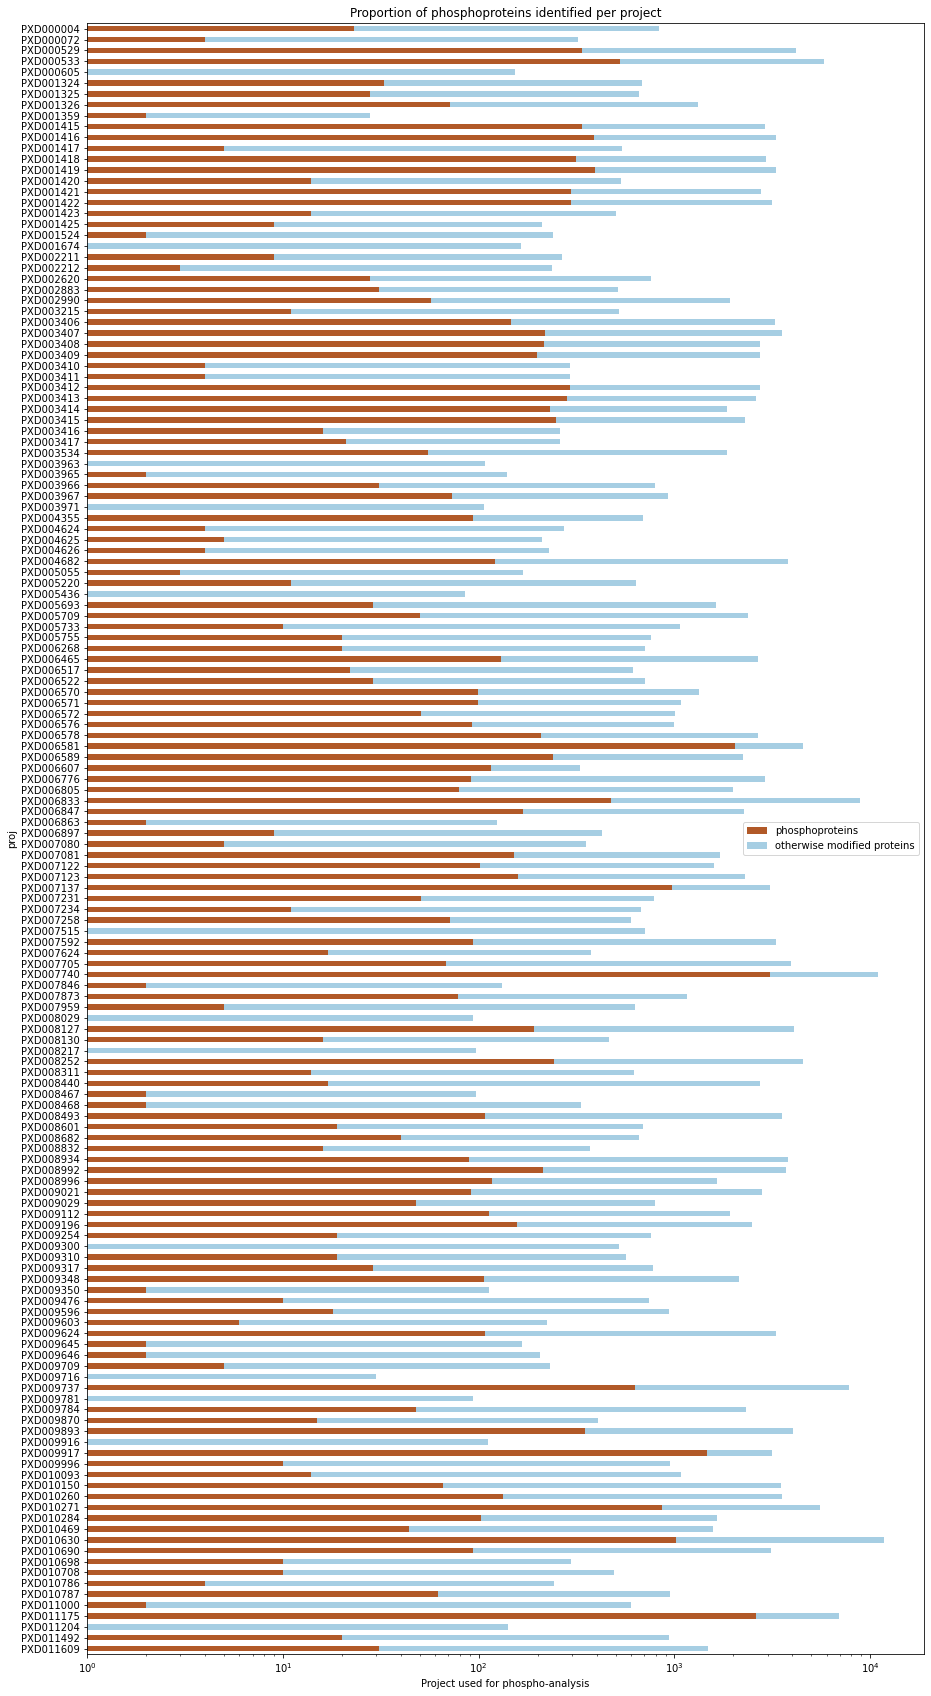

In [12]:
comb_protein_proj.sort_values(by=["proj"], ascending=False,inplace=False).plot(kind="barh",stacked=True, x="proj",
                                                                               logx=True,
                                                                               colormap="Paired_r",figsize=(15,30))
plt.xlabel("Project used for phospho-analysis")
plt.title("Proportion of phosphoproteins identified per project")
#plt.savefig("/Users/Hanne/Documents/universiteit/thesis_MA2/images_thesis/article/Psites_per_proj.png", format="png", bbox_inches="tight")
plt.show()